In this notebook, we will introduce PyTorch, talk about its important concepts and features, and eventually train an MNIST classifier using what we have learned. 

## NOTE: Click the top-left "Open In Playground" button! 

## 6.819 / 6.869 PyTorch Tutorial (03/17/2021, 03/19/2021)

Written by Tongzhou Wang (MIT)

Taught by Geeticka Chauhan (MIT), Ching-Yao Chuang (MIT)

## Check running in GPU session:
Runtime -> Change runtime type -> Hardware accelerator -> GPU

## What is PyTorch?

1. A Python GPU-accelerated tensor library (NumPy, but faster)
2. Differentiable Programming with dynamic computation graphs
3. Flexible and efficient **neural network** library
4. Python-first framework (easy to integrate with other Python libraries, debug, and extend)
  + Quick conversion from & to NumPy array, integration with other Python libs.
  + Your favorite Python debugger.
  + Adding custom ops with Python/c++ extension. 
  + Running in purely c++ environment with the c++ API.

Useful links:

+ PyTorch documentation: https://pytorch.org/docs/stable/index.html

  Most math operations can be found as `torch.*` or `Tensor.*`.
+ PyTorch official tutorials (60-min blitz is a good start): https://pytorch.org/tutorials/
    - Transfer learning tutorial: https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
+ PyTorch examples (DCGAN, ImageNet training, Reinforcement Learning, etc.): https://github.com/pytorch/examples/

In [ ]:
# dripyto# install basical image libs
!pip install Pillow>=5.0.0
!pip install -U image
!pip install wheel

# install torch and torchvision (a utility library for computer vision that provides many public datasets and pre-trained models)
!pip install torch torchvision

     |████████████████████████████████| 7.9 MB 5.2 MB/s 
  Created wheel for image: filename=image-1.5.33-py2.py3-none-any.whl size=19496 sha256=409b6dc0e686888ef8802ed613a19cc44cb1e41550d9e9465c4dc83e0db67a08
  Stored in directory: /root/.cache/pip/wheels/56/88/e6/897194cfe8c08a8b9afd881d3bf53d102e13fa39607d721383
Successfully built image


## 1. GPU-accelerated Tensor Library

A Tensor is a multi-dimensional array (matrix).

In [ ]:
import torch

In [ ]:
# Create a 3x5 matrix filled with zeros

x = torch.zeros(3, 5)
print(x)

In [ ]:
# Create a 3x5 matrix filled with random values

y = torch.randn(3, 5)
print(y)

In [ ]:
# Shape manipulations

print('\n.t()  (transpose): ')
print(y.t())

print('.reshape(5, 3): ')
print(y.reshape(5, 3))

# Heads up: there might be memory considerations in using .view() vs .reshape()
# you can see the discussion https://discuss.pytorch.org/t/difference-between-view-reshape-and-permute/54157 
# for more details

In [ ]:
# Slicing
print(y[1:])

# Slicing + select every two elements
print(y[1:, ::2])

tensor([[-0.4917, -0.5725,  0.2043,  0.6340, -1.5252],
        [-0.9198,  0.9469,  0.0128, -0.7640, -0.6269]])
tensor([[-0.4917,  0.2043, -1.5252],
        [-0.9198,  0.0128, -0.6269]])


In [ ]:
# Basic arithmetic

print(x + 2)

tensor([[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]])


In [ ]:
print(y * (x + 2))

tensor([[ 1.8846,  1.6979,  2.4043,  0.1968,  1.9089],
        [-0.9835, -1.1450,  0.4087,  1.2681, -3.0505],
        [-1.8397,  1.8937,  0.0257, -1.5280, -1.2538]])


In [ ]:
print((y * (x + 2)).exp())

tensor([[ 6.5836,  5.4626, 11.0711,  1.2175,  6.7458],
        [ 0.3740,  0.3182,  1.5048,  3.5541,  0.0473],
        [ 0.1589,  6.6441,  1.0260,  0.2170,  0.2854]])


#### 1.1 GPU Acceleration

Everything can be run on a GPU

First, let us create a [`torch.device`](https://pytorch.org/docs/stable/tensor_attributes.html#torch-device) object representing a GPU device.

In [ ]:
cuda0 = torch.device('cuda:0')  # pick the GPU at index 0

In [ ]:
y

tensor([[ 0.9423,  0.8490,  1.2022,  0.0984,  0.9545],
        [-0.4917, -0.5725,  0.2043,  0.6340, -1.5252],
        [-0.9198,  0.9469,  0.0128, -0.7640, -0.6269]])

In [ ]:
# Move a tensor from CPU to GPU
# NOTE: the first time you access a GPU, a context is created so this may take a
# few seconds. But subsequent uses will be fast.

cuda_y = y.to(cuda0)
print(cuda_y)

tensor([[ 0.9423,  0.8490,  1.2022,  0.0984,  0.9545],
        [-0.4917, -0.5725,  0.2043,  0.6340, -1.5252],
        [-0.9198,  0.9469,  0.0128, -0.7640, -0.6269]], device='cuda:0')


In [ ]:
# Or directly creating a tensor on GPU

cuda_x = torch.zeros(3, 5, device=cuda0)
print(cuda_x)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], device='cuda:0')


In [ ]:
# All functions and methods work on GPU tensors

print((cuda_y * (cuda_x + 2)).exp())  # values match the CPU results above!

tensor([[ 6.5836,  5.4626, 11.0711,  1.2175,  6.7458],
        [ 0.3740,  0.3182,  1.5048,  3.5541,  0.0473],
        [ 0.1589,  6.6441,  1.0260,  0.2170,  0.2854]], device='cuda:0')


### 1.2 NumPy Bridge

Converting a `torch.Tensor` to a `np.ndarray` and vice versa is a breeze.

The `torch.Tensor` and `np.ndarray` will share their underlying memory locations (if the `torch.Tensor` is on CPU and `dtype` is the same), and changing one will change the other.

In [ ]:
import numpy as np

In [ ]:

x = torch.randn(5)
print(x)

tensor([ 1.2957,  0.1709,  0.4314, -1.1843, -0.7004])


In [ ]:

x.numpy()

array([ 1.2956771,  0.1709385,  0.4314196, -1.1842686, -0.7003988],
      dtype=float32)

In [ ]:
# Converting a tensor to an array

x = torch.randn(5)
print(x)

# use `my_tensor.numpy()`
x_np = x.numpy()
print(x_np)

# or `np.asarray`

x_np = np.asarray(x)
print(x_np)

tensor([-0.3702, -1.0601, -0.8131,  0.5233,  0.5861])
[-0.3702056  -1.0601125  -0.81313217  0.52326614  0.5860689 ]
[-0.3702056  -1.0601125  -0.81313217  0.52326614  0.5860689 ]


In [ ]:
# in-place changes on one affects the other

x[0] = -1
print(x)
print(x_np)

tensor([-1.0000, -1.0601, -0.8131,  0.5233,  0.5861])
[-1.         -1.0601125  -0.81313217  0.52326614  0.5860689 ]


In [ ]:
# Converting an array to a tensor

a = np.random.randn(3, 4)

a_pt = torch.as_tensor(a)
print(a_pt)

tensor([[-0.0838,  1.1721, -0.3259, -0.8454],
        [ 0.1099,  0.7884, -2.5333, -0.0500],
        [ 1.2753, -1.4147, -0.1714, -1.7567]], dtype=torch.float64)


In [ ]:
# the resulting CPU Tensor shares memory with the array!

a_pt[0] = -1
print(a)

[[-1.         -1.         -1.         -1.        ]
 [ 0.10991108  0.78837753 -2.53334222 -0.05000192]
 [ 1.27527075 -1.41469584 -0.17142662 -1.75667704]]


In [ ]:
# But if we change dtype or device, a copy is made

a_half_pt = torch.as_tensor(a, dtype=torch.float16, device=cuda0)
a_half_pt[0] = 9
print(a_half_pt)

print(a)  # original array is not affected

tensor([[ 9.0000,  9.0000,  9.0000,  9.0000],
        [ 0.1099,  0.7886, -2.5332, -0.0500],
        [ 1.2754, -1.4150, -0.1714, -1.7568]], device='cuda:0',
       dtype=torch.float16)
[[-1.         -1.         -1.         -1.        ]
 [ 0.10991108  0.78837753 -2.53334222 -0.05000192]
 [ 1.27527075 -1.41469584 -0.17142662 -1.75667704]]


## 2. Differentiable Programming with Dynamic Computation Graphs

Gradient-based optimization is an essential part of the modern deep learning frenzy. PyTorch uses [reverse-mode automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation) to efficiently compute gradients through any computations done on tensors.

### Dynamic vs. Static

A neural network is essentially a sequence of mathematical operations on tensors, which build up a computation graph.

Most frameworks such as TensorFlow, Theano, Caffe and CNTK have a static view of the world. One has to build a neural network, and reuse the same structure again and again. Changing the way the network behaves means that one has to start from scratch.

PyTorch uses a technique called reverse-mode auto-differentiation, which allows you to change the way your network behaves arbitrarily with zero lag or overhead. 


### Dynamic computation graphs

When you create a tensor with its `requires_grad` flag set to `True`, the [`autograd`](https://pytorch.org/docs/stable/autograd.html) engine considers it as a **leaf** node of the computation graph. As you compute with it, the graph is dynamically expanded. When you ask for gradients (e.g., via `tensor.backward()`), the `autograd` engine traces backwards through the graph, and automatically computes the gradients for you.

![alt text](https://github.com/pytorch/pytorch/raw/master/docs/source/_static/img/dynamic_graph.gif)


**Let's see this in action!**

In [ ]:
# Now, we want tensors with `requires_grad=True`

a = torch.ones(3, 5, requires_grad=True)  # tensor of all ones
print(a)  # notice that the `requires_grad` flag is on!

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], requires_grad=True)


In [ ]:
# Currently `a` has no gradients

print(a.grad)

None


In [ ]:
# Let's compute the gradient wrt the sum

s = a.sum()
print('sum of a is', s)

sum of a is tensor(15., grad_fn=<SumBackward0>)


In [ ]:
# Notice the `grad_fn` of `s`. it represents the function used to propagate 
# gradients from `s` to previous nodes of the graph (`a` in this case).

s.backward()  # compute gradient!
print(a.grad)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


In [ ]:
# Yay! Indeed d \sum_a / d a_ij = 1

In [ ]:
# Gradients are automatically **accumulated**

a.sum().backward()
print(a.grad)  # now the new gradients are added to the old ones

# Don't worry, we have easy ways to clear the gradients too. 
# We will talk about those later!

tensor([[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]])


In [ ]:
a.grad.zero_()

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [ ]:
# Now let's do something slightly fancier, on GPU!

a = torch.ones(3, 4, device=cuda0, requires_grad=True)
b = torch.randn(4, 4, device=cuda0, requires_grad=True)

result = (torch.mm(a, b.t().exp()) * 0.5).sum() * b.prod() - b.mean()
print('this complicated chain of operation gives....')
print(result)

this complicated chain of operation gives....
tensor(-0.3538, device='cuda:0', grad_fn=<SubBackward0>)


In [ ]:
result.backward()
print('\ngradient wrt a is')
print(a.grad)
print('\ngradient wrt b is')
print(b.grad)


gradient wrt a is
tensor([[0.0009, 0.0007, 0.0026, 0.0007],
        [0.0009, 0.0007, 0.0026, 0.0007],
        [0.0009, 0.0007, 0.0026, 0.0007]], device='cuda:0')

gradient wrt b is
tensor([[-0.0767, -0.1350, -0.0526, -0.0377],
        [-0.0330,  0.0375, -0.1246, -0.0405],
        [-0.0522, -0.0507, -0.0527,  0.1234],
        [-0.0754, -0.0822, -0.0778,  0.0327]], device='cuda:0')


#### Exercise: Compute gradients

In [ ]:
########################
#                      #
#       Exercise       #
#                      #
########################


a = torch.linspace(-3, 3, 10, dtype=torch.float32, requires_grad=True)
b = torch.logspace(0.2, 2, 10, requires_grad=True)


# ANSWER
z = torch.log( b.sum() / a.exp().sum()) - b.sum()
print(z)

z.backward()

print(a.grad)
print(b.grad)

tensor(-266.3888, grad_fn=<SubBackward0>)
tensor([-0.0012, -0.0024, -0.0046, -0.0089, -0.0174, -0.0339, -0.0659, -0.1284,
        -0.2501, -0.4872])
tensor([-0.9963, -0.9963, -0.9963, -0.9963, -0.9963, -0.9963, -0.9963, -0.9963,
        -0.9963, -0.9963])


Compute 

$$z = \log \left( \frac{1}{\sum_i \exp(a_i)} \sum_j b_j \right) - \sum_k b_k,$$

and then the gradients of $z$ w.r.t. $\mathbf{a}$ and $\mathbf{b}$.

They should look like:

```
# Gradient wrt a
tensor([-0.0012, -0.0024, -0.0046, -0.0089, -0.0174, -0.0339, -0.0659, -0.1284,
        -0.2501, -0.4872])

# Gradient wrt b
tensor([-0.9963, -0.9963, -0.9963, -0.9963, -0.9963, -0.9963, -0.9963, -0.9963,
        -0.9963, -0.9963])
```

#### Manipulating the `requires_grad` flag

In [ ]:
# Other than directly setting it at creation time, you can change this flag 
# in-place using `my_tensor.requires_grad_()`, or, as in the above example, or
# just directly setting the attribute.

x = torch.randn(1, 4, 5)
print(x)
print('x does not track gradients')

tensor([[[-0.1517, -0.0253, -0.2430,  0.0286,  0.2724],
         [ 0.0670,  1.0555, -0.5847, -1.7841, -0.9471],
         [ 2.0123,  0.2040, -1.0632,  1.3583, -1.1258],
         [ 2.2399, -0.5928,  0.9187,  0.1019, -0.0120]]])
x does not track gradients


In [ ]:
x.requires_grad_()
print(x)
print('x now **does** track gradients')

tensor([[[-0.1517, -0.0253, -0.2430,  0.0286,  0.2724],
         [ 0.0670,  1.0555, -0.5847, -1.7841, -0.9471],
         [ 2.0123,  0.2040, -1.0632,  1.3583, -1.1258],
         [ 2.2399, -0.5928,  0.9187,  0.1019, -0.0120]]], requires_grad=True)
x now **does** track gradients


## 3. Flexible and Efficient Neural Network Library

The [`torch.nn`](https://pytorch.org/docs/stable/nn.html) and [`torch.optim`](https://pytorch.org/docs/stable/optim.html) packages provide many efficient implementations of neural network components:
  + Affine layers and [activation functions](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity)
  + Normalization methods
  + [Initialization schemes](https://pytorch.org/docs/stable/nn.html#torch-nn-init)
  + [Loss functions](https://pytorch.org/docs/stable/nn.html#loss-functions)
  + [Embeddings](https://pytorch.org/docs/stable/nn.html#sparse-layers)
  + [Distributed and Multi-GPU training](https://pytorch.org/docs/stable/nn.html#dataparallel-layers-multi-gpu-distributed)
  + [Gradient-based optimizers](https://pytorch.org/docs/stable/optim.html)
  + [Learning rate schedulers](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate)
  + etc.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

#### `torch.nn` Layers

We will use the [fully connected linear layer (`nn.Linear`)](https://pytorch.org/docs/stable/nn.html#torch.nn.Linear) as an example. 

A fc layer performs an affine transform with a 2D weight parameter $\mathbf{w}$ and a 1D bias parameter $\mathbf{b}$:

$$ f(\mathbf{x}) = \mathbf{w}^\mathrm{T} \mathbf{x} + \mathbf{b}.$$

In [ ]:
fc = nn.Linear(in_features=8, out_features=8)
print(fc)

Linear(in_features=8, out_features=8, bias=True)


In [ ]:
# It has two parameters, the weight and the bias

for name, p in fc.named_parameters():
    print('param name: {}\t shape: {}'.format(name, p.shape))

param name: weight	 shape: torch.Size([8, 8])
param name: bias	 shape: torch.Size([8])


In [ ]:
fc.weight

Parameter containing:
tensor([[ 0.3352, -0.1809, -0.2359, -0.0127,  0.1868, -0.3139, -0.1571,  0.3523],
        [-0.1351,  0.0382, -0.2556,  0.2438,  0.2143, -0.2987, -0.2316,  0.1138],
        [ 0.0481, -0.2589, -0.2268, -0.2551,  0.0900, -0.0735, -0.1564,  0.3280],
        [ 0.0181,  0.1072, -0.2556,  0.3421,  0.3177, -0.1724,  0.3432, -0.2044],
        [-0.2425,  0.2764,  0.2884, -0.2826,  0.1685, -0.0102,  0.3057,  0.0075],
        [ 0.0730, -0.0641,  0.1214,  0.2345,  0.1060,  0.1890,  0.1066, -0.1952],
        [-0.1976,  0.3406, -0.3475,  0.3264,  0.2583, -0.2507,  0.3286,  0.2909],
        [-0.3518,  0.0172, -0.1846, -0.0706, -0.2909,  0.3105, -0.1665,  0.2372]],
       requires_grad=True)

In [ ]:
# These parameters by default have `requires_grad=True`, so they will collect gradients!

print(fc.bias)

Parameter containing:
tensor([ 0.2998,  0.3437,  0.3377,  0.1592, -0.2516,  0.0282,  0.2422,  0.0932],
       requires_grad=True)


In [ ]:
# Let's construct an input tensor with 2 dimensions:
#   - batch dimension of size 64
#   - 8 features

x = torch.randn(64, 8)

In [ ]:
# Pass it through the fc layer

result = fc(x)
print(result.shape)

# Why does the `result` have shape [64, 8]?
#   - batch dimension of size 64
#   - 8 output features

torch.Size([64, 8])


In [ ]:
# Even though the input `x` has `requires_grad=False`, the convolution
# weight and bias parameters has `requires_grad=True`. So the result also
# requires gradient, with a `grad_fn` to compute backward pass for 
# convolutions.
print(result.requires_grad)
print(result.grad_fn)  # It says `AddmmBackward` because the fc layer performs a matmul and an addition

True


In [ ]:
# Say (arbitrarily) we want the layer to behave like the cosine function (yes I know it is impossible)

target = x.cos()

In [ ]:
# Let's try MSE loss

loss = F.mse_loss(result, target)
print(loss)

tensor(0.8269, grad_fn=<MseLossBackward>)


In [ ]:
# Compute gradients

loss.backward()
print(fc.bias.grad)

tensor([-0.0287, -0.0415, -0.0476, -0.0800, -0.2196, -0.1437, -0.0884, -0.1523])


In [ ]:
# We can manually perform GD via a loop

print('bias before GD', fc.bias)

lr = 0.5
with torch.no_grad():  
    # this context manager tells PyTorch that we don't want ops inside to be 
    # tracked by autograd!
    for p in fc.parameters():
        p -= lr * p.grad
        
print('bias after GD', fc.bias)

bias before GD Parameter containing:
tensor([ 0.2998,  0.3437,  0.3377,  0.1592, -0.2516,  0.0282,  0.2422,  0.0932],
       requires_grad=True)
bias after GD Parameter containing:
tensor([ 0.3141,  0.3645,  0.3615,  0.1992, -0.1418,  0.1000,  0.2864,  0.1694],
       requires_grad=True)


#### `torch.optim` optimizers

More easily, we can use the provided [`torch.optim`](https://pytorch.org/docs/stable/optim.html#torch.optim) optimizers. Let's use the [`torch.optim.SGD`](https://pytorch.org/docs/stable/optim.html#torch.optim.SGD) optimizer for example!

In [ ]:
# Let's optimize for 5000 iterations

# First, put the layer on GPU so things run faster

fc = fc.to(cuda0)

In [ ]:
# Construct an optimizer

optim = torch.optim.SGD(fc.parameters(), lr=0.1)

In [ ]:
# training loop

batch_size = 256

for ii in range(5000):
    # clear gradients accumulated on the parameters
    optim.zero_grad()
    
    # get an input (say we only care inputs sampled from N(0, I))
    x = torch.randn(batch_size, 8, device=cuda0)  # this has to be on GPU too
    
    # target is the cos(x)
    target = x.cos()
    
    # forward pass
    result = fc(x)
    
    # compute loss
    loss = F.mse_loss(result, target)
    
    # compute gradients
    loss.backward()
    
    # let the optimizer do its work; the parameters will be updated in this call
    optim.step()
    
    # add some printing
    if ii % 500 == 0:
        print('iteration {}\tloss {:.5f}'.format(ii, loss))


iteration 0	loss 0.70493
iteration 500	loss 0.19953
iteration 1000	loss 0.19317
iteration 1500	loss 0.19427
iteration 2000	loss 0.20497
iteration 2500	loss 0.20776
iteration 3000	loss 0.19877
iteration 3500	loss 0.19058
iteration 4000	loss 0.21169
iteration 4500	loss 0.20406


### Building Deep Neural Neworks

A single `nn.Linear` layer didn't do very well! The MSE loss above is still pretty large.

But this is expected as it is simply a linear transformation and thus has limited expressive power. Let's replace it with a deep network and see out it works!

For simplicity, we will use the following feedforward network architecture (from top to bottom):

```
        [Input]
           ||
[Fully-Connected 8 -> 32]
           ||
    [ReLU activation]
           ||
[Fully-Connected 32 -> 32]
           ||
    [ReLU activation]
           ||
[Fully-Connected 32 -> 8]
           ||
        [Output]
```

In PyTorch, a model is represented by a [`nn.Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module) object. The `nn.Linear` layer we looked at above is also an instance of it:

In [ ]:
assert isinstance(nn.Linear(8, 8), nn.Module)

Now we want to build a deep network, we can compose the needed layers together by writing a custom `nn.Module` ourselves.

In [ ]:
class MyNet(nn.Module):  # subclass nn.Module
    def __init__(self):
        super(MyNet, self).__init__()
        
        # We need 3 fully-connected layers!
        # Simply assigning them as attributes will
        # make sure that PyTorch keeps track of them.
        
        # 8 => 32
        self.fc1 = nn.Linear(8, 32)
        # 32 => 32
        self.fc2 = nn.Linear(32, 32)
        # 32 => 8
        self.fc3 = nn.Linear(32, 8)
        
        
    # We also need to define a `forward()` method that details
    # what should happen when this module is used.
    def forward(self, x):
        x = self.fc1(x)
        x = x.relu()
        x = self.fc2(x)
        x = x.relu()
        return self.fc3(x)

In [ ]:
# Okay! Now we are ready to use this deep network! 

# Construct a network and move to GPU
net = MyNet().to(cuda0)

# Construct an optimizer
optim = torch.optim.SGD(net.parameters(), lr=0.1)

In [ ]:
# The same training loop, but now using a deep network!

batch_size = 256

for ii in range(5000):
    # clear gradients accumulated on the parameters
    optim.zero_grad()
    
    # get an input (say we only care inputs sampled from N(0, I))
    x = torch.randn(batch_size, 8, device=cuda0)  # this has to be on GPU too
    
    # target is the cos(x)
    target = x.cos()
    
    # forward pass
    result = net(x)  # CHANGED: fc => net
    
    # compute loss
    loss = F.mse_loss(result, target)
    
    # compute gradients
    loss.backward()
    
    # let the optimizer do its work; the parameters will be updated in this call
    optim.step()
    
    # add some printing
    if ii % 500 == 0:
        print('iteration {}\tloss {:.5f}'.format(ii, loss))


iteration 0	loss 0.63074
iteration 500	loss 0.16067
iteration 1000	loss 0.08402
iteration 1500	loss 0.03476
iteration 2000	loss 0.01531
iteration 2500	loss 0.01088
iteration 3000	loss 0.00906
iteration 3500	loss 0.00722
iteration 4000	loss 0.00606
iteration 4500	loss 0.00601


The network did so much better than a single fully-connected layer!

#### More `nn.*` Layers

There are many other layers provided in the `nn.*` package. To list a few, we have
+ Convolutions: e.g., [`nn.Conv2d`](https://pytorch.org/docs/stable/nn.html#torch.nn.Conv2d)
+ Normalizations: e.g., [`nn.BatchNorm2d`](https://pytorch.org/docs/stable/nn.html#torch.nn.BatchNorm2d)
+ Activation functions: e.g., [`nn.ReLU`](https://pytorch.org/docs/stable/nn.html#torch.nn.ReLU)
+ etc.

In [ ]:
# A conv 2d layer with 4x4 filters, mapping inputs with 3 channels to outputs with 5 channels

conv = nn.Conv2d(in_channels=3, out_channels=5, kernel_size=4)

In [ ]:
# It also has two parameters, the weight and the bias

for name, p in conv.named_parameters():
    print('param name: {}\t shape: {}'.format(name, p.shape))
    
# Why does the weight have shape [5, 3, 4, 4]? 

param name: weight	 shape: torch.Size([5, 3, 4, 4])
param name: bias	 shape: torch.Size([5])


#### `nn.Module` Containers

`torch.nn` also provides many other [`nn.Module` containers](https://pytorch.org/docs/stable/nn.html#containers) for easily building complex networks. E.g., [`nn.Sequential`](https://pytorch.org/docs/stable/nn.html#torch.nn.Sequential) executes a list of submodules sequentially, passing each output to the next's input. 

Using `nn.Sequential`, the above network can be equivalently written as:

In [ ]:
net = nn.Sequential(
    nn.Linear(8, 32),
    nn.ReLU(),               # This nn.Module does the ReLU activation on its input
    nn.Linear(32, 32),
    nn.ReLU(),
    nn.Linear(32, 8),
).to(cuda0)

### Exercise: Build your own deeper net

In [ ]:
########################
#                      #
#       Exercise       #
#                      #
########################

Perform the same regression task (i.e., modeling $f(x) = \cos(x)$), but with the following modifications:

+ Use one *more* hidden layer
+ Each hidden layer should have size 128 neurons
+ Use the `tanh` activation function (see [`my_tensor.tanh()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.tanh))
+ Use a batch size of 128
+ Use the [`torch.optim.Adam`](https://pytorch.org/docs/stable/optim.html#torch.optim.Adam) optimizer
+ Use the [L1 loss](https://pytorch.org/docs/stable/nn.html#torch.nn.functional.l1_loss) function

In [ ]:
# Answer
class MyDeeperNet(nn.Module):
    def __init__(self):
        super(MyDeeperNet, self).__init__()
        
        # We need 4 fully-connected layers now! 
        # Each should have 128 neurons, except for the last one, which outputs vectors of size 8.
        
        self.fc1 = nn.Linear(8, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 128)
        self.fc4 = nn.Linear(128, 8)
        
        
    def forward(self, x):
        x = self.fc1(x)
        x = x.tanh()
        x = self.fc2(x)
        x = x.tanh()
        x = self.fc3(x)
        x = x.tanh()
        return self.fc4(x)
        
# Construct our new awesome deeper network and move to GPU
deeper_net = MyDeeperNet().to(cuda0)

# Alternative implementation:
#
# deeper_net = nn.Sequential(
#     nn.Linear(8, 128),
#     nn.Tanh(),
#     nn.Linear(128, 128),
#     nn.Tanh(),
#     nn.Linear(128, 128),
#     nn.Tanh(),
#     nn.Linear(128, 8),
# ).to(cuda0)

# Construct an Adam optimizer
deeper_net_optim = torch.optim.Adam(deeper_net.parameters(), lr=0.01)


# Training loop

batch_size = 128

for ii in range(5000):
    # clear gradients accumulated on the parameters
    deeper_net_optim.zero_grad()
    
    # get an input (say we only care inputs sampled from N(0, I))
    x = torch.randn(batch_size, 8, device=cuda0)  # this has to be on GPU too
    
    # target is the cos(x)
    target = x.cos()
    
    # forward pass
    result = deeper_net(x)
    
    # compute loss
    loss = F.l1_loss(result, target)
    
    # compute gradients
    loss.backward()
    
    # let the optimizer do its work; the parameters will be updated in this call
    deeper_net_optim.step()
    
    # add some printing
    if ii % 500 == 0:
        print('iteration {}\tloss {:.5f}'.format(ii, loss))


iteration 0	loss 0.71164
iteration 500	loss 0.06184
iteration 1000	loss 0.04621
iteration 1500	loss 0.04806
iteration 2000	loss 0.03137
iteration 2500	loss 0.03781
iteration 3000	loss 0.03769
iteration 3500	loss 0.03489
iteration 4000	loss 0.03227
iteration 4500	loss 0.03411


## 4. (Practice) Building an MNIST Classifier


Using what we have learned, let's build a simple MNIST digits classifier.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


torch.manual_seed(1234)  # for reproducibility

cuda0 = torch.device('cuda:0')

### Loading Data

The [`torchvision`](https://pytorch.org/docs/stable/torchvision/index.html) library provides a wide range of standard vision datasets and networks with pretrained weights. We will use [the `torchvision.datasets.MNIST` class](https://pytorch.org/docs/stable/torchvision/datasets.html#mnist) to easily access the MNIST dataset. You can also [write your own custom datasets](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html).

In [ ]:
import torchvision

# # setup for stable downloading MNIST dataset
# from six.moves import urllib
# opener = urllib.request.build_opener()
# opener.addheaders = [('User-agent', 'Mozilla/5.0')]
# urllib.request.install_opener(opener)

# # load MNIST dataset
# mnist_train = torchvision.datasets.MNIST(root='./data', download=True, train=True)

# download MNIST data
!rm -rf data
!git clone https://github.com/knamdar/data

# load MNIST dataset
mnist_train = torchvision.datasets.MNIST(root='./data', download=False, train=True)

Cloning into 'data'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 16 (delta 2), reused 16 (delta 2), pack-reused 0
Unpacking objects: 100% (16/16), done.


Each element of the dataset is a 2-tuple, consisting of the image of the digit, and its label. E.g.,

In [ ]:
image, label = mnist_train[13]
print('This is a digit {}:'.format(label))
image

This is a digit 6:


In [ ]:
type(image)

PIL.Image.Image

The image is given as a `PIL.Image`. To automatically obtain a `torch.Tensor`, we can add a [`torchvision.transforms.ToTensor` ](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.ToTensor) transform when constructing the dataset:

In [ ]:
mnist_train = torchvision.datasets.MNIST(root='./data', download=False, train=True,
                                         transform=torchvision.transforms.ToTensor())  # the ToTensor transform converts PIL.Image to torch.Tensor

In [ ]:
image, label = mnist_train[13]
print(type(image))
print(image.shape)  # MNIST images are 28x28, and have a single channel representing brightness.

<class 'torch.Tensor'>
torch.Size([1, 28, 28])


In [ ]:
print('This image has max={}'.format(image.max()), 'and min={}'.format(image.min()))

This image has max=1.0 and min=0.0


In deep learning, it is often a good idea to normalize network inputs to be centered around zero. We use the [`torchvision.transforms.Normalize`](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Normalize) tranform to achieve this. Adding this transform, we construct the dataset as:

In [ ]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=(0.5,), std=(0.5,)),  # [0, 1] range => [-1, 1] range
])

mnist_train = torchvision.datasets.MNIST(root='./data', download=False, train=True,
                                         transform=transform)
mnist_val = torchvision.datasets.MNIST(root='./data', download=False, train=False,
                                         transform=transform)

In [ ]:
image, label = mnist_train[13]
print(type(image))
print(image.shape)  # MNIST images are 28x28, and have a single channel representing brightness.

<class 'torch.Tensor'>
torch.Size([1, 28, 28])


In [ ]:
print('This image has max={}'.format(image.max()), 'and min={}'.format(image.min()))

This image has max=1.0 and min=-1.0


In [ ]:
print('training set size:\t{}'.format(len(mnist_train)))
print('validation set size:\t{}'.format(len(mnist_val)))

training set size:	60000
validation set size:	10000


We use the PyTorch `torch.utils.data.DataLoader` to automatically load batched data. 

In [ ]:
batch_size = 512

train_loader = torch.utils.data.DataLoader(mnist_train, 
                                           batch_size=batch_size,
                                           shuffle=True,                   # shuffle training set
                                           num_workers=4,                  # turns on multi-processing loading so training is not blocked by data loading
                                           pin_memory=True)                # pin_memory allows faster transfer from CPU to GPU
val_loader = torch.utils.data.DataLoader(mnist_val, 
                                         batch_size=batch_size, 
                                         num_workers=4, 
                                         pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
# Each element yielded by `train_loader` (a Python iterable) is still a 2-tuple, 
# but now consisting of a batched image tensor, and a batched label tensor.

images, labels = next(iter(train_loader))
print('batched image tensor shape: {}'.format(images.shape))
print('batched label tensor shape: {}'.format(labels.shape))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


batched image tensor shape: torch.Size([512, 1, 28, 28])
batched label tensor shape: torch.Size([512])


### Building the Network

We will use a convolutional network for classification. The following architecture is adapted from the famous [LeNet-5](https://ieeexplore.ieee.org/document/726791) [1].

[1] LeCun, Yann, et al. "Gradient-based learning applied to document recognition." Proceedings of the IEEE 86.11 (1998): 2278-2324.

In [ ]:
class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(in_features=16 * 5 * 5, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = F.max_pool2d(out, 2)
        out = F.relu(self.conv2(out))
        out = F.max_pool2d(out, 2)
        out = out.reshape(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out

In [ ]:
net = MyNet().to(cuda0)

In [ ]:
# This network output a size 10 vector for each input image, as verified below 
# using a random input tensor.

random_input = torch.randn(123, 1, 28, 28, device=cuda0)
output = net(random_input)
print(output.shape)

torch.Size([123, 10])


### Training Loop


For classification, we will use the cross-entropy loss [`F.cross_entropy`](https://pytorch.org/docs/stable/nn.html#torch.nn.functional.cross_entropy) to train this network.

We can write a function that iterates through the training set (via `train_loader`) and train for 1 epoch. The code is extremely similar to what we did for approximating $f(x) = \cos(x)$, only with new ways to load data and compute loss.

In [ ]:
def train(net, optim):
    net.train()
    for image_cpu, label_cpu in train_loader:
        # put data onto GPU
        image = image_cpu.to(cuda0)
        label = label_cpu.to(cuda0)
        
        # clear gradient
        optim.zero_grad()
        
        # forward through the network
        output = net(image)
        
        # compute loss and gradient
        loss = F.cross_entropy(output, label)
        loss.backward()
        
        # update parameters
        optim.step()

Let's also write a function that evaluates our network on the validation set.

In [ ]:
def evaluate(net):
    total = 0
    correct = 0
    
    net.eval()  # puts the network in eval mode. this is important when the 
                # network has layers that behaves differently in training and 
                # evaluation time, e.g., dropout and batch norm.
    for image_cpu, label_cpu in val_loader:
        # put data onto GPU
        image = image_cpu.to(cuda0)
        label = label_cpu.to(cuda0)
        
        with torch.no_grad():  # gradients are not tracked in this context manager
                               # since we are evaluating, gradients are not needed 
                               # and we can save some time and GPU memory.
              
            # forward through the network, and get the predicted class
            prediction = net(image).argmax(dim=-1)  
            
            total += image.size(0)  # batch size
            correct += (prediction == label).sum().item()  # `.item()` retreives a python number from a 1-element tensor
            
    return correct / total

In [ ]:
# Without any training, the network accuracy matches that of random guessing: ~10%.

print('At initialization, the network has accuracy {:.4f}%'.format(evaluate(net) * 100))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


At initialization, the network has accuracy 11.3500%


### Putting Everything Together

In [ ]:
num_epochs = 10
lr = 0.1

optim = torch.optim.SGD(net.parameters(), lr=lr)

for epoch in range(num_epochs):
    print('Epoch: {}\tValidation Accuracy: {:.4f}%'.format(epoch, evaluate(net) * 100))
    train(net, optim)

print('Done! \tValidation Accuracy: {:.4f}%'.format(evaluate(net) * 100))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: 0	Validation Accuracy: 11.3500%
Epoch: 1	Validation Accuracy: 72.6900%
Epoch: 2	Validation Accuracy: 91.7800%
Epoch: 3	Validation Accuracy: 96.6900%
Epoch: 4	Validation Accuracy: 96.1900%
Epoch: 5	Validation Accuracy: 95.9500%
Epoch: 6	Validation Accuracy: 96.7600%
Epoch: 7	Validation Accuracy: 98.2800%
Epoch: 8	Validation Accuracy: 96.3200%
Epoch: 9	Validation Accuracy: 98.4100%
Done! 	Validation Accuracy: 98.3800%


In [ ]:
import PIL

# Utility function
def tensor2image(tensor):
    return PIL.Image.fromarray((tensor.detach() * 127.5 + 128).clamp_(0, 255).to('cpu', torch.uint8).numpy()[0])

In [ ]:
# Get a data sample we want to attack

data, label = mnist_val[30]
data = data.to(cuda0)

In [ ]:
# Look at the image

tensor2image(data)

In [ ]:
# Label is...

print('label is', label)

label is 3


In [ ]:
# Let's see what our trained network says about this image.


# turn the network into eval mode
net.eval()
output = net(data.unsqueeze(0))  # .unsqueeze(0) insert a batch dimension so it looks like batched data
prediction = output.argmax(-1)
print('predicted class is', prediction.item())

predicted class is 3


check more samples:

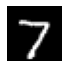

predicted class is 7


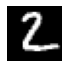

predicted class is 2


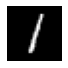

predicted class is 1


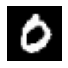

predicted class is 0


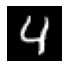

predicted class is 4


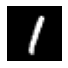

predicted class is 1


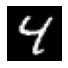

predicted class is 4


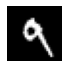

predicted class is 9


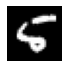

predicted class is 5


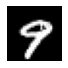

predicted class is 9


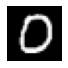

predicted class is 0


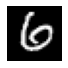

predicted class is 6


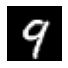

predicted class is 9


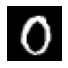

predicted class is 0


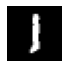

predicted class is 1


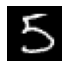

predicted class is 5


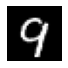

predicted class is 9


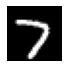

predicted class is 7


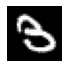

predicted class is 3


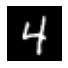

predicted class is 4


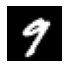

predicted class is 9


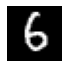

predicted class is 6


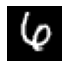

predicted class is 6


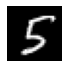

predicted class is 5


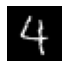

predicted class is 4


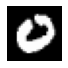

predicted class is 0


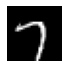

predicted class is 7


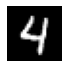

predicted class is 4


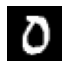

predicted class is 0


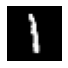

predicted class is 1


In [ ]:
import matplotlib.pyplot as plt
for i in range(30):
    # Get a data sample we want to attack

    data, label = mnist_val[i]
    data = data.to(cuda0)
    # Look at the image

    plt.figure(figsize=(1,1))
    plt.imshow(tensor2image(data), cmap='gray')
    plt.axis('off')
    plt.show()
    
    # turn the network into eval mode
    net.eval()
    output = net(data.unsqueeze(0))  # .unsqueeze(0) insert a batch dimension so it looks like batched data
    prediction = output.argmax(-1)
    print('predicted class is', prediction.item())

##### Congratulations! You finished the PyTorch tutorial! 